In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
action_df = pd.read_csv('actionindex_61.csv')

In [3]:
action_df.tail(5)

,Year,Games,PlateAppearances,AtBats,Homeruns,HRperGame,triples,doubles,singles,walks,...,pitchersPerGame,pitchesPerPA,pitchesPerGame,strikesPerGame,strikesPerPitch,foulPerStrike,foulPerPitch,foulPerGame,actionIndex,attendance
row.56,2017,2430,185295,165567,6105,2.512346,795,8397,26918,15829,...,4.221811,3.958418,301.841564,191.207819,0.633471,0.279921,0.177322,53.523045,52.509877,29922.623457
row.57,2018,2431,185139,165432,5585,2.297408,847,8264,26322,15686,...,4.360346,3.961110,301.668449,191.770053,0.635698,0.278876,0.177281,53.480049,51.963801,28659.511312
row.58,2019,2429,186517,166651,6776,2.789625,785,8531,25947,15895,...,4.411486,3.989004,306.305887,194.765336,0.635852,0.283304,0.180140,55.177851,51.795698,28203.744751
row.59,2020,898,66506,59030,2304,2.565702,241,2823,9071,6092,...,4.433185,4.036358,298.933185,187.761693,0.628106,0.273341,0.171687,51.322940,49.005568,NaN
row.60,2021,2429,181818,161941,5944,2.447098,671,7863,25006,15794,...,4.434747,3.964470,296.752573,189.159325,0.637431,0.282433,0.180032,53.424866,49.782524,18659.023476


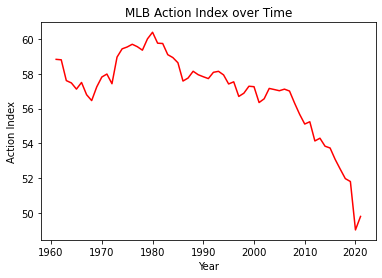

In [4]:
plt.plot(action_df['Year'], action_df['actionIndex'], 'r')
plt.xlabel('Year')
plt.ylabel('Action Index')
plt.title('MLB Action Index over Time')
plt.show()

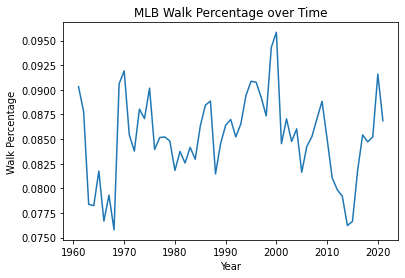

In [5]:
plt.plot(action_df['Year'], action_df['walks']/action_df['PlateAppearances'])
plt.xlabel('Year')
plt.ylabel('Walk Percentage')
plt.title('MLB Walk Percentage over Time')
plt.show()

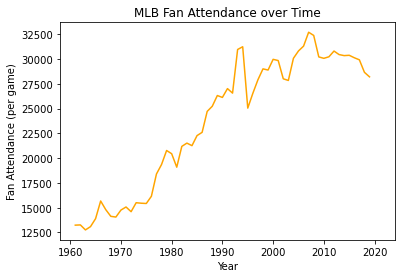

In [6]:
plt.plot(action_df['Year'], action_df['attendance'], c='orange')
#plt.vlines(x=2007, ymin=min(action_df['attendance']), ymax=max(action_df['attendance']), colors='black', ls=':', lw=2, label='2007')
plt.xlabel('Year')
plt.ylabel('Fan Attendance (per game)')
plt.title('MLB Fan Attendance over Time')
#plt.legend()
plt.show()

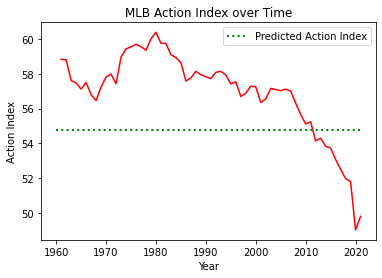

In [7]:
plt.plot(action_df['Year'], action_df['actionIndex'], 'red')
plt.hlines(y=54.75, xmin=1960, xmax=2021, colors='green', ls=':', lw=2, label='Predicted Action Index')
plt.xlabel('Year')
plt.ylabel('Action Index')
plt.title('MLB Action Index over Time')
plt.legend()
plt.show()

## How does adding a DH to the NL affect the Action Index?

In [8]:
# National League batting data for pitchers and DH for 1971-2021
NL_P_bat = pd.read_csv('NL_P_batting.csv')
NL_DH_bat = pd.read_csv('NL_DH_batting.csv')

In [9]:
# compute the balls in play for each position
NL_P_PA = sum(NL_P_bat['PA'])
NL_DH_PA = sum(NL_DH_bat['PA'])
NL_P_BB = sum(NL_P_bat['BB'])
NL_DH_BB = sum(NL_DH_bat['BB'])
NL_P_HBP = sum(NL_P_bat['HBP'])
NL_DH_HBP = sum(NL_DH_bat['HBP'])
NL_P_SO = sum(NL_P_bat['SO'])
NL_DH_SO = sum(NL_DH_bat['SO'])

NL_P_BIP = NL_P_PA - NL_P_BB - NL_P_HBP - NL_P_SO
NL_DH_BIP = NL_DH_PA - NL_DH_BB - NL_DH_HBP - NL_DH_SO

print(f'Percentage of Balls in Play for NL Pitchers from 1971-2021: {round(NL_P_BIP / NL_P_PA, 4)}')
print(f'Percentage of Balls in Play for NL Designated Hitters from 1971-2021: {round(NL_DH_BIP / NL_DH_PA, 4)}')

Percentage of Balls in Play for NL Pitchers from 1971-2021: 0.6381
Percentage of Balls in Play for NL Designated Hitters from 1971-2021: 0.643


In [10]:
# repeat analysis but for last 20 years only
NL_P_bat_2001 = pd.read_csv('NL_P_batting_2001.csv')
NL_DH_bat_2001 = pd.read_csv('NL_DH_batting_2001.csv')

NL_P_PA_2001 = sum(NL_P_bat_2001['PA'])
NL_DH_PA_2001 = sum(NL_DH_bat_2001['PA'])
NL_P_BB_2001 = sum(NL_P_bat_2001['BB'])
NL_DH_BB_2001 = sum(NL_DH_bat_2001['BB'])
NL_P_HBP_2001 = sum(NL_P_bat_2001['HBP'])
NL_DH_HBP_2001 = sum(NL_DH_bat_2001['HBP'])
NL_P_SO_2001 = sum(NL_P_bat_2001['SO'])
NL_DH_SO_2001 = sum(NL_DH_bat_2001['SO'])

NL_P_BIP_2001 = NL_P_PA_2001 - NL_P_BB_2001 - NL_P_HBP_2001 - NL_P_SO_2001
NL_DH_BIP_2001 = NL_DH_PA_2001 - NL_DH_BB_2001 - NL_DH_HBP_2001 - NL_DH_SO_2001

print(f'Percentage of Balls in Play for NL Pitchers from 2001-2021: {round(NL_P_BIP_2001 / NL_P_PA_2001, 4)}')
print(f'Percentage of Balls in Play for NL Designated Hitters from 2001-2021: {round(NL_DH_BIP_2001 / NL_DH_PA_2001, 4)}')

Percentage of Balls in Play for NL Pitchers from 2001-2021: 0.6139
Percentage of Balls in Play for NL Designated Hitters from 2001-2021: 0.6433


In [11]:
# Assume pitchers hit 9th, giving least number of at bats per season, average 622 PA per season
NL_P_BIP_per_season = 622 * (NL_P_BIP_2001 / NL_P_PA_2001)
NL_DH_BIP_per_season = 622 * (NL_DH_BIP_2001 / NL_DH_PA_2001)

# increase in batted balls
BIP_increase_per_season = 15 * (NL_DH_BIP_per_season - NL_P_BIP_per_season)
BIP_increase_per_season

274.060037910381

In [12]:
# calculate NL_DH_actionIndex
action_2001_df = action_df[action_df['Year'] >= 2001]
action_2001_df = action_2001_df.reset_index(drop=True)
action_2001_df['NL_DH_actionIndex'] = ((action_2001_df['actionIndex'] * action_2001_df['Games']) + 274) / action_2001_df['Games']
action_2001_df.head(5)

,Year,Games,PlateAppearances,AtBats,Homeruns,HRperGame,triples,doubles,singles,walks,...,pitchesPerPA,pitchesPerGame,strikesPerGame,strikesPerPitch,foulPerStrike,foulPerPitch,foulPerGame,actionIndex,attendance,NL_DH_actionIndex
0,2001,2429,186976,166234,5458,2.247015,928,8813,28680,15806,...,3.770147,290.212845,182.300947,0.628163,0.273849,0.172022,49.923014,56.350762,29848.494854,56.463565
1,2002,2426,186615,165582,5059,2.085326,921,8700,28592,16246,...,3.775763,290.442704,181.866859,0.626171,0.273718,0.171395,49.780297,56.565952,28006.840890,56.678895
2,2003,2430,187449,166737,5207,2.142798,934,8827,29089,15889,...,3.779273,291.531276,183.070782,0.627963,0.270495,0.169861,49.519753,57.164609,27839.865432,57.277366
3,2004,2428,188539,167353,5451,2.245058,898,8919,29254,16222,...,3.801436,295.189044,184.942751,0.626523,0.273227,0.171183,50.531301,57.100082,30073.866145,57.212932
4,2005,2431,186292,166335,5017,2.063760,888,8863,29223,15207,...,3.772331,289.080625,182.670506,0.631902,0.272418,0.172141,49.762649,57.031674,30817.350884,57.144385


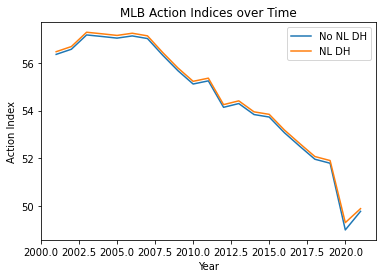

In [13]:
# plot comparing the two action indices
plt.plot(action_2001_df['Year'], action_2001_df['actionIndex'], label='No NL DH')
plt.plot(action_2001_df['Year'], action_2001_df['NL_DH_actionIndex'], label='NL DH')
plt.xlabel('Year')
plt.ylabel('Action Index')
plt.title('MLB Action Indices over Time')
plt.legend()
plt.show()

# How does moving the pitchers mound back affect the Action Index?

In [14]:
pitchdata_df = pd.read_csv('pitchmakeup.csv')
outcomes_df = pd.read_csv('outcomes.csv')

In [15]:
pitchdata_df.head(5)

,Name,Team,FB.,FBv,SL.,SLv,CT.,CTv,CB.,CBv,CH.,CHv,SF.,SFv,KN.,KNv,XX.,playerid,year
1,Emmanuel Clase,CLE,70.10%,100.3,29.90%,91.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.60%,21032,2021
2,Jose Alvarado,PHI,80.60%,99.4,16.10%,94.1,NaN,NaN,3.30%,87.1,NaN,NaN,NaN,NaN,NaN,NaN,1.50%,17780,2021
3,Jacob deGrom,NYM,57.40%,99.3,33.40%,91.6,NaN,NaN,0.30%,83.5,8.90%,91.4,NaN,NaN,NaN,NaN,NaN,10954,2021
4,Edwin Diaz,NYM,62.20%,98.8,37.80%,90.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.40%,14710,2021
5,Aroldis Chapman,NYY,62.30%,98.5,26.70%,85.1,NaN,NaN,NaN,NaN,NaN,NaN,11.10%,88.5,NaN,NaN,0.80%,10233,2021


In [16]:
outcomes_df.head(5)

,Name,Team,W,L,ERA,G,GS,CG,ShO,SV,...,HR,BB,IBB,HBP,WP,BK,SO,playerid,year,batBall
1,Aaron Loup,NYM,6,0,0.95,65,2,0,0,0,...,1,16,0,4,0,0,57,10343,2021,141
2,Jacob deGrom,NYM,7,2,1.08,15,15,1,1,0,...,6,11,0,1,0,0,146,10954,2021,166
3,Josh Hader,MIL,4,2,1.23,60,0,0,0,34,...,3,24,0,2,3,2,102,14212,2021,96
4,Emmanuel Clase,CLE,4,5,1.29,71,0,0,0,24,...,2,16,3,0,3,1,74,21032,2021,186
5,Ranger Suarez,PHI,8,5,1.36,39,12,1,1,4,...,4,33,3,5,1,0,107,17277,2021,270


In [17]:
merged_df = pd.merge(pitchdata_df, outcomes_df, on=['playerid','year'])
merged_df.head(5)

,Name_x,Team_x,FB.,FBv,SL.,SLv,CT.,CTv,CB.,CBv,...,R,ER,HR,BB,IBB,HBP,WP,BK,SO,batBall
0,Emmanuel Clase,CLE,70.10%,100.3,29.90%,91.9,NaN,NaN,NaN,NaN,...,18,10,2,16,3,0,3,1,74,186
1,Jose Alvarado,PHI,80.60%,99.4,16.10%,94.1,NaN,NaN,3.30%,87.1,...,30,26,5,47,5,7,9,1,68,124
2,Jacob deGrom,NYM,57.40%,99.3,33.40%,91.6,NaN,NaN,0.30%,83.5,...,14,11,6,11,0,1,0,0,146,166
3,Edwin Diaz,NYM,62.20%,98.8,37.80%,90.7,NaN,NaN,NaN,NaN,...,27,24,3,23,1,9,5,1,89,135
4,Aroldis Chapman,NYY,62.30%,98.5,26.70%,85.1,NaN,NaN,NaN,NaN,...,23,21,9,38,2,3,7,0,97,103


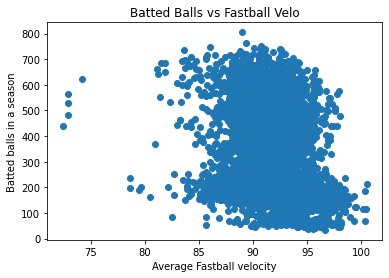

In [18]:
plt.scatter(merged_df['FBv'], merged_df['batBall'])
plt.xlabel('Average Fastball velocity')
plt.ylabel('Batted balls in a season')
plt.title('Batted Balls vs Fastball Velo')
plt.show()

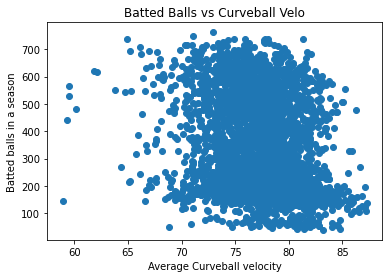

In [19]:
plt.scatter(merged_df['CBv'], merged_df['batBall'])
plt.xlabel('Average Curveball velocity')
plt.ylabel('Batted balls in a season')
plt.title('Batted Balls vs Curveball Velo')
plt.show()

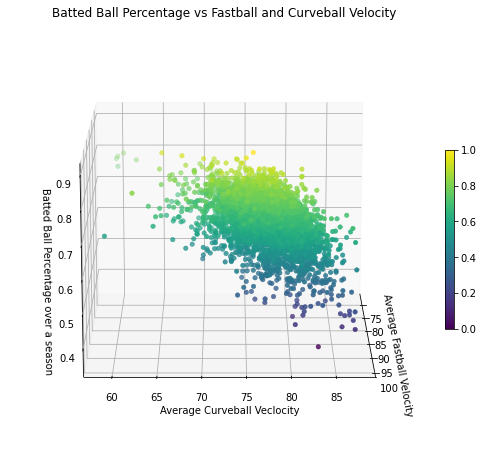

In [20]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
velo_df = merged_df.dropna(subset=['FBv', 'CBv', 'batBall'])
cmap='viridis'
ax.scatter(velo_df['FBv'], velo_df['CBv'], velo_df['batBall']/velo_df['TBF'], c=velo_df['batBall']/velo_df['TBF'],
                cmap=cmap, linewidth=0.5)
sm = plt.cm.ScalarMappable(cmap=cmap)
fig.colorbar(sm, fraction=0.02, pad=0.01)
ax.set_title('Batted Ball Percentage vs Fastball and Curveball Velocity')
ax.set_xlabel('Average Fastball Velocity')
ax.set_ylabel('Average Curveball Veclocity')
ax.set_zlabel('Batted Ball Percentage over a season')
ax.view_init(elev=15, azim=0)

In [21]:
from sklearn.linear_model import LinearRegression
X = velo_df[['FBv', 'CBv']]
X = X.reset_index(drop=True)
y = velo_df['batBall'] / velo_df['TBF']
y = y.reset_index(drop=True)
regr = LinearRegression().fit(X, y)
preds = regr.predict(X)
xx, yy = np.meshgrid(velo_df['FBv'], velo_df['CBv'])
z = regr.intercept_ + regr.coef_[0]*xx + regr.coef_[1]*yy

### Check for statistical significance

In [22]:
import statsmodels.api as sm

C:\Users\btiv\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [23]:
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     634.9
Date:                Tue, 26 Jul 2022   Prob (F-statistic):          6.79e-236
Time:                        21:43:38   Log-Likelihood:                 5141.5
No. Observations:                3494   AIC:                        -1.028e+04
Df Residuals:                    3491   BIC:                        -1.026e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8319      0.032     57.469      0.000       1.769       1.894
FBv           -0.0117      0.000    -25.143      0.000      -0.013      -0.011
CBv           -0.0008      0.000     -2.121      0.034      -0.001   -5.69e-05
==============================================================================
Omnibus:                      184.390   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.804
Skew:                          -0.530   Prob(JB):                     1.26e-50
Kurtosis:                       3.675   Cond. No.                     4.07e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
regr.coef_[0]

-0.011698402758336742

In [25]:
regr.coef_[1]

-0.0007507539717927438

In [26]:
regr.intercept_

1.8319160650312354

### Check for multicollinearity

In [27]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#find design matrix for linear regression model using 'rating' as response variable 
y_vif, X_vif = dmatrices('batBall/TBF ~ FBv+CBv', data=velo_df, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif['variable'] = X_vif.columns

#view VIF for each explanatory variable 
vif

,VIF,variable
0,1149.557431,Intercept
1,1.794396,FBv
2,1.794396,CBv


In [28]:
print(f'Coefficient of FBv is: {regr.coef_[0]}')
print(f'Coefficient of CBv is: {regr.coef_[1]}')
print(f'Intercept is: {regr.intercept_}')

Coefficient of FBv is: -0.011698402758336742
Coefficient of CBv is: -0.0007507539717927438
Intercept is: 1.8319160650312354


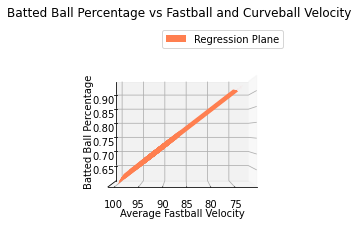

<Figure size 864x864 with 0 Axes>

In [29]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
fig = plt.figure(figsize=(12,12))
surf = ax.plot_surface(xx, yy, z, color='coral', shade=False, label='Regression Plane')
surf._facecolors2d = surf._facecolor3d
surf._edgecolors2d = surf._edgecolor3d
ax.set_title('Batted Ball Percentage vs Fastball and Curveball Velocity', y=1.1)
ax.set_xlabel('Average Fastball Velocity')
ax.set_ylabel('')
ax.set_yticks([])
ax.set_zlabel('Batted Ball Percentage')
ax.legend(loc='upper right')
ax.view_init(elev=0, azim=90)
plt.show()

### Analyze how far to move mound back

In [30]:
pitchfx_df = pd.read_csv('umpires2019.csv')

In [31]:
def reaction_time(pitch_df, distance, pitch_type):
    pitch_df = pitch_df[pitch_df['pitch_type'] == pitch_type]
    pitch_df = pitch_df.dropna(subset=['vy0','ay'])
    pitch_df = pitch_df.reset_index(drop=True)
    y0 = 50 + (distance - 60.5)
    home_plate = 1.417
    vy0 = pitch_df['vy0'].mean()
    ay = pitch_df['ay'].mean()
    vy = -np.sqrt((vy0**2) + 2*ay*(home_plate - y0))
    total_time = (vy - vy0)/ay
    return total_time

def times_to_velo(pitch_df, times, pitch_type):
    pitch_df = pitch_df[pitch_df['pitch_type'] == pitch_type]
    pitch_df = pitch_df.dropna(subset=['vx0','vy0', 'vz0' ,'ay', 'ax', 'az', 'release_pos_x', 'release_pos_z'])
    pitch_df = pitch_df.reset_index(drop=True)
    mean_ax = pitch_df['ax'].mean()
    mean_ay = pitch_df['ay'].mean()
    mean_az = pitch_df['az'].mean()
    z_break = pitch_df['pfx_z'].mean()
    x_break = pitch_df['pfx_x'].mean()
    
    velos = []
    for time in times:
        d_x = x_break
        d_y = 1.417 - 50
        d_z = -z_break
        vx0 = (d_x - (1/2)*((mean_ax)*time**2))/time
        vy0 = (d_y - (1/2)*((mean_ay)*time**2))/time
        vz0 = (d_z - (1/2)*((mean_az)*time**2))/time
        velo = np.sqrt((vx0**2) + (vy0**2) + (vz0**2))
        velos.append(velo / 5280 * 3600)
    
    return velos

def at_plate_velo(pitch_df, distance):
    y0 = 50 + (distance - 60.5)
    home_plate = 1.417
    vy0 = pitch_df['vy0']
    ay = pitch_df['ay']
    z0 = pitch_df['release_pos_z']
    vz0 = pitch_df['vz0']
    az = pitch_df['az']
    x0 = pitch_df['release_pos_x']
    vx0 = pitch_df['vx0']
    ax = pitch_df['ax']
    
    vy = -np.sqrt((vy0**2) + 2*ay*(home_plate - y0))
    total_time = (vy - vy0)/ay
    vx = vx0 + ax*total_time
    vz = vz0 + az*total_time
    return vx, vy, vz

In [32]:
# fastball analysis
distance_grid = [59, 59.5, 60, 60.5, 61, 61.5, 62, 62.5, 63, 63.5, 64, 64.5, 65]
react_times = []
for distance in distance_grid:
    react_times.append(reaction_time(pitchfx_df, distance, 'FF'))
react_times

[0.3602862080447132,
 0.36426922941613077,
 0.3682558285757045,
 0.37224601518214046,
 0.3762397989376817,
 0.380237189588383,
 0.38423819692438815,
 0.3882428307802104,
 0.3922511010350134,
 0.3962630176128978,
 0.4002785904831844,
 0.40429782966070577,
 0.4083207452060977]

In [33]:
# get equivalent speed at 60.5 mound
adjusted_velos = times_to_velo(pitchfx_df, react_times, 'FF')
adjusted_velos

[95.41460985662926,
 94.4474263635252,
 93.50117275132098,
 92.57520449130041,
 91.66890332751842,
 90.7816759521061,
 89.91295275992441,
 89.06218667707766,
 88.22885205822539,
 87.41244364802417,
 86.61247560239124,
 85.82848056560645,
 85.06000879957162]

In [34]:
# repeat process for curveballs
react_times_cb = []
for distance in distance_grid:
    react_times_cb.append(reaction_time(pitchfx_df, distance, 'CU'))
adjusted_velos_cb = times_to_velo(pitchfx_df, react_times_cb, 'CU')
adjusted_velos_cb

[80.42232859115596,
 79.61967180327291,
 78.83472126316592,
 78.06693703608406,
 77.31580124317092,
 76.58081694892635,
 75.86150711529899,
 75.15741361780013,
 74.4680963193883,
 73.79313219820592,
 73.13211452554832,
 72.48465209072265,
 71.85036846970341]

In [35]:
q1 = np.array([-0.011968 * fb for fb in adjusted_velos])
q2 = np.array([-0.00075 * cb for cb in adjusted_velos_cb])
pred_batted_balls = q1 + q2 + 1.83

In [36]:
adjusted_action_indices = []
for pred in pred_batted_balls:
    adjusted_action_indices.append((action_df['PlateAppearances'].iloc[len(action_df)-3] * pred) / action_df['Games'].iloc[len(action_df)-3])
adjusted_action_indices

[48.20425535662728,
 49.139316343800594,
 50.05412318960018,
 50.94929930699849,
 51.82544269424563,
 52.68312721632732,
 53.522903809664676,
 54.34530161536559,
 55.15082904592352,
 55.93997478988017,
 56.71320875861921,
 57.47098297914465,
 58.21373243640449]

### Analyze mound at 62.5 feet

In [37]:
adjusted_action_indices[7]

54.34530161536559

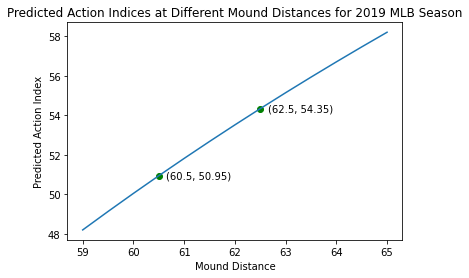

In [38]:
x_points = [60.5, 62.5]
y_points = [50.95, 54.345]
txts = ['(60.5, 50.95)', '(62.5, 54.35)']
plt.plot(distance_grid, adjusted_action_indices)
plt.scatter(x_points, y_points, c='g')
plt.ylabel('Predicted Action Index')
plt.xlabel('Mound Distance')
plt.title('Predicted Action Indices at Different Mound Distances for 2019 MLB Season')
for i, txt in enumerate(txts):
    plt.annotate(txt, (x_points[i] + 0.15, y_points[i] - 0.15))
plt.show()

### Compute new vertical position of fastball

In [39]:
def new_vertical_pos(pitch_df, distance):
    y0 = 50 + (distance - 60.5)
    home_plate = 1.417
    vy0 = pitch_df['vy0']
    ay = pitch_df['ay']
    z0 = pitch_df['release_pos_z']
    vz0 = pitch_df['vz0']
    az = pitch_df['az']
    z_break = pitch_df['pfx_z']
    
    vy = -np.sqrt((vy0**2) + 2*ay*(home_plate - y0))
    total_time = (vy - vy0)/ay
    t_perceived = (-vy0 - np.sqrt((vy0**2) - (2 * ay * 10))) / ay
    z_perceived = z0 + (vz0 * t_perceived) + (1/2)*(az)*(t_perceived**2)
    vz_perceived = vz0 + (az*t_perceived)
    t_home = total_time - t_perceived
    z_no_air = z_perceived + (vz_perceived*t_home) + (1/2)*(az * t_home**2)
    return (-z_break/12) + z_no_air

In [40]:
fastball_pitch_df = pitchfx_df[pitchfx_df['pitch_type'] == 'FF']
fastball_pitch_df = fastball_pitch_df.reset_index(drop=True)

In [41]:
mound_adjusted_pos = []
for i in range(len(fastball_pitch_df)):
    estimated_pos = new_vertical_pos(fastball_pitch_df.iloc[i], 62.5)
    mound_adjusted_pos.append(estimated_pos)

In [42]:
print(f'New mean fastball height at mound distance of 62.5 is {round(sum(mound_adjusted_pos)/len(mound_adjusted_pos), 4)} feet')

New mean fastball height at mound distance of 62.5 is 2.5801 feet


In [43]:
print(f'Height difference of {round((2.7038 - 2.5801) * 12, 3)} inches for increase of mound by 2 feet')

Height difference of 1.484 inches for increase of mound by 2 feet
